\section{Installing nbextensions}
In this example we will create a Jupyter notebook that can be exported in Latex format. In order to have some formulas to work with we will consider a simply supported steel beam, subject to an uniform load \textbf{q}.

Before we start writing any code, however, we need to expand the capabilities of Jupyter using third-party \textbf{extensions}. To be more specific, we will install a set of extensions called \textbf{nbextensions}, that will allow as to use Latex syntax in markdown cells and also to hide the code we write.

If you followed the Anaconda installation at the beginning of the book, your computer should also have installed \textbf{anaconda prompt} by default. Anaconda prompt is a command line interface that allows the user to install additional packages using the \textbf{pip} or \textbf{conda} package managers. We will use conda to install \textbf{nbextensions}. Open anaconda navigator, and type:

\textbf{conda install -c conda-forge jupyter_contrib_nbextensions} 

This will install nbextensions from the anaconda repositories, so you need to be connected to the internet for the command to run. Now when you start jupyter notebook you can access the configuration page by writing "nbextensions" in place of "tree" in the address bar. The configuration page looks like this:

\begin{figure}[H]
\centering\includegraphics{configuration.png}
\caption{Nbextensions configuration page}
\end{figure}

From here you can activate the extensions that you need. In order to be able to write latex syntax inside markdown cell we will need the extension called \textbf{(some) LaTeX environments for Jupyter}, and in order to hide code cells we will also need the \textbf{hide input} extension. 

Now create a new notebook. You should see some new icons in the toolbar:
\begin{figure}[H]
\centering\includegraphics{toolbar.png}
\caption{Toolbar icons}
\end{figure}
The button with the \^ symbol is used to hide the input of code cells. Now that LaTeX_envs is enable we can also write some simple LaTeX environments inside markdown cells, like \textbf{section} and \textbf{itemize} for example, or math formulas using dollar signs.

\section{Formatting the output of cells in LaTeX}
If the final goal is to output the notebookas a LaTeX document (.tex), then we need a way to display the outputs of code cells accordingly. A way to do this is using the \textbf{Latex} module contained in `IPython.display`:

In [9]:
from IPython.display import Latex
a=15
b=7
res=a+b
display(Latex("$a+b=%d+%d=%d$"%(a,b,res)))

<IPython.core.display.Latex object>

As you can see the output of the cell is now in LaTeX format.

\section{Converting dataframes to LaTeX tables}
Pandas gives the user the possibility to convert any dataframe into a LaTeX table, using `pandas.DataFrame.to_latex()`. Here is an example:

In [10]:
import pandas as pd
df=pd.DataFrame({"A":[3,2,1,6], "B":[4,5,9,7]}, index=[0,1,2,3])
display(Latex(df.to_latex(bold_rows=True, column_format="lll")))

<IPython.core.display.Latex object>

The function accepts a lot of parameters to customize the appearence of the table. Setting \textbf{bold_rows} to \emph{True}, for example, will make print the row index in bold font. Another useful parameter is \textbf{column_format}, to which you can pass a string such as "rlc" to specify the alignment of the columns ("r"=\emph{right}, "l"=\emph{left}, "c"=\emph{center}). Notice how in order to display the LaTeX syntax correctly we need to wrap `df.to_latex()` inside `Latex()`. The table however is still very basic: it does not have a caption, and it does not look very good. An easy solution is simply to add more LaTeX code around the output of `Latex(df.to_latex())`. For example, we could use the \textbf{table} environment like this: 

In [11]:
display(Latex(
    "\\begin{table}[H]\n\centering\n"\
    +df.to_latex(bold_rows=True, column_format='lll')\
    +"\caption{My Table}\n \end{table}"))

<IPython.core.display.Latex object>

The output of `df.to_latex()` is just a simple string, so we can concatenate it with any other strings using $+$. In this case we are wrapping it inside `\begin{table} \end{table}` as well as specifying a caption using `caption{My Table}`. Because strings are one-line sequences of characters, we need tell \textbf{Latex()} where the linebreaks are using `\n`.

\section{Deflection of a steel beam}
In this example we will consider three different simply supported beams of length $L_1$, $L_2$ and $L_3$ subjected to three different uniform loads $q_1$, $q_2$, and $q_3$. For each beam we will plot the bending moment distributions and calculate the maximum deflection.
\begin{itemize}
\item \textbf{Beam 1:} $L_1=5m$, $q_1=20\;KN/m$ 
\item \textbf{Beam 2:} $L_2=6m$, $q_2=18\;KN/m$ 
\item \textbf{Beam 3:} $L_3=6.5m$, $q_3=13\;KN/m$ 
\end{itemize}

All three beams will have the same cross section and material. We will use a standard \textbf{IPE220}, with a second moment of inertia around the strong axis of $2772\;mm^4$. The young modulus of the steel is $200000\;Mpa$. As always, the first step is to save all the relevant data into variables or dataframes:

In [12]:
import pandas as pd
import numpy as np

Iy=2772*10**4 #mm^4
E=200000 #Mpa

loads=np.array([20, 18, 13]) #kN/m
lengths=np.array([5, 6, 6.5]) #m

To demonstrate the capability of exporting \textbf{matplotlib} plots in LaTeX, let's plot the moment distribution of the first beam: 

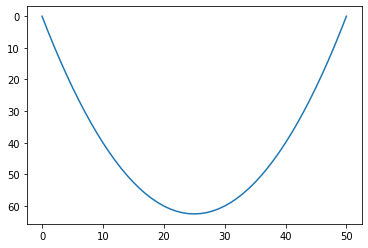

In [13]:
import matplotlib.pyplot as plt

x=np.linspace(0,lengths[0], 51)
M1=loads[0]*lengths[0]*x/2-(loads[0]*x**2)/2
fig, ax= plt.subplots()
ax.invert_yaxis()
ax.plot(M1)
plt.savefig("plot1.pdf")
plt.show()

Now we need to calculate the maximum deflection of the beam, using the well-known formula from elastic theory:
$$w_{max}=\cfrac{5}{384}\cfrac{qL^4}{EI}$$
All the calculations will be performed inside a dataframe called \textbf{results}. Each row represents one of the beams, and we will add more columns as we calculate new quantities. First, we create the dataframe specifying only the index:

In [14]:
results=pd.DataFrame(index=(["Beam 1", "Beam 2", "Beam 3"]))

Then we can start adding columns. Let's add the loads and the lengths first:

In [15]:
results["l"]=lengths
results["q"]=loads

display(Latex(
    "\\begin{table}[H]\n\centering\n"\
    +results.to_latex(bold_rows=True, column_format='lll')\
    +"\caption{My Table}\n \end{table}"))

<IPython.core.display.Latex object>

Now we can use the existing columns to perform calculations and store the results in new ones. If you have used a spreadsheed before you should be familiar with this type of workflow, and will find that pandas dataframes behave very similarly to Excel tables. Let's finish this example by calculating the maximum moments and deflections:

In [16]:
results["$M_{max}$"]=(results.q*results.l**2)/8
results["$w_{max}$"]=(5/384)*(results.q*results.l**4)/(E*Iy*0.001**3)

display(Latex(
    "\\begin{table}[H]\n\centering\n"\
    +results.to_latex(bold_rows=True, column_format='lllll', escape=False)\
    +"\caption{My Table}\n \end{table}"))

<IPython.core.display.Latex object>

There are a few things to note here. First, the headers of the new columns that have been created contain LaTeX syntax. It will look ugly in jupyter, but once the notebook has been exported in LaTeX format the table will be rendered correctly. Also, there is a new argument passed to `to_latex()` which is \textbf{escape}, set to \emph{False}. This prevents pandas from escaping LaTeX special characters in column names.

\section{Exporting the notebook}
Now we come to the final step of this chapter, which is exporting the notebook that we have just created. The tool that we will use is called \textbf{nbconvert}. It is a command line interface that comes pre-installed with jupyter and can be accessed with anaconda prompt. Maybe you have never used a command line interface, so let's first explain what it is and what you can do with it. \textbf{anaconda prompt}, type `ls` and hit enter. You should now see a list of all the files and folders contained in the path specified in the command line. To enter one of the folders, simply type `cd` followed by the folder's name. If you type `cd ..` you will enter the parent folder. Using `cd` you can go anywhere in your computer, but sometimes it is faster to navigate to a folder directly. In order to do this simply type `cd` followed by the \textbf{absolute path} of the folder you want to access. Remember to use forward slashes, and to enclose folder names that have spaces in them using quotation marks.

\subsection{Using nbconvert}
That is pretty much all you need to know about how to navigate your computer using a command line interface, so now let's move on to using nbconvert to export the notebook into a .tex file. Using anaconda prompt, navigate to the folder where the notebook is saved. Once there, type `jupyter nbconvert --to latex --template article notebook_name.ipynb`, where \emph{notebook_name} is the name of the notebook you want to convert. Press enter, and you should now see that there is a new file in the folder called \emph{notebook_name.tex}. If you open it and run it using your trusted LaTeX editor, you will most likely get an error. This is because the notebook that we have created in this chapter contains LaTeX code that requires additional packages, such as \textbf{float} in order to display the tables correctly. We will solve this problem later: first let's explain the command that we have typed to obtain this result. 

Think of \textbf{jupyter nbconvert} as a function call to which you can pass various parameters. \textbf{--to} specifyes the format of the output. By default this is set to html. \textbf{--template} specifyes the template that nbconvert will use while performing the conversion. A template is basically a set of rules that the converter has to follow. In this case we set it to \textbf{article}, which produces a decent enough LaTeX document, but the images don't display correctly and all the code is visible. The solution is to use a custom template that recognizes when the code is hidden and renders the images better. Teaching how to write a custom template is beyond the scope of this book, so we will use one that has already been created. Go to https://python4civil.weebly.com/exporting-in-latex.html and download temp.tplx, and place it in the same folder of your jupyter notebook. Hide every code input in the notebook, and save it. Then in anaconda prompt run `jupyter nbconvert --to latex --template temp.tplx notebook_name.ipynb`. This will update the existing latex file already present in the folder. Now open it with your favourite LaTeX editor and run it: the result should be a nicely typesetted document without any python code showing, and with nice images and tables.